# Setting up DL environment

<ol>
    <ul>
          Step 1. Open Anaconda prompt
    </ul>    
    <ul>
          Step 2. conda create --name DL_ENV python=3.6
    </ul>
    <ul>
          Step 3. activate deeplearning
    </ul>    
    <ul>
        Step 4. conda install ipython
    </ul>    
    <ul>
       Step 5. conda install jupyter
    </ul>

         conda install pandas
         conda install scipy seaborn scikit-learn matplotlib    
 </ol>
 
<BR>
    <H2> Installing TensorFlow and Keras </H2>

<OL>
    <UL>
        pip install --upgrade tensorflow
    </UL>    
    <UL>
        pip install --upgrade keras
    </UL>    
</OL>    

In [1]:
conda remove --name myenv --all

SyntaxError: invalid syntax (<ipython-input-1-cb5c0084af6b>, line 1)

In [1]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
#white
# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [36]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [37]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [38]:
wines.to_csv('WineFullData.csv')

In [39]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [40]:
import numpy as np
np.ravel(wines.type)

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = 
train_test_split(X, y, test_size=0.33, random_state=42)

/Users/rajnishechauhan/anaconda/envs/dl_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [42]:
X_train.shape

(4352, 11)

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, 
with a standard deviation of 1.

[ x–mean(x) ] / stdev(x)

In [43]:
# Import `StandardScaler` from `sklearn.preprocessing`
#http://benalexkeen.com/feature-scaling-with-scikit-learn/
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [44]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(5, activation='relu'))


# Add one hidden layer 
#model.add(Dense(3, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [45]:
# Model output shape
model.output_shape



(None, 1)

In [46]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Model config
model.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_16',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_17',
    'trainable': True,
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', '

In [48]:
# List all weight tensors 
model.get_weights()

[array([[-0.5052964 , -0.40711117,  0.34257877, -0.10614297, -0.03849155,
         -0.01531428,  0.39058584,  0.42603028],
        [-0.29468802, -0.4550425 ,  0.23696142,  0.16841805,  0.05154425,
          0.5490654 ,  0.28269243,  0.16643184],
        [-0.2296997 ,  0.49320203, -0.50134456,  0.21887374, -0.14726147,
          0.09507185, -0.07367542,  0.04245508],
        [ 0.04366839,  0.39236814, -0.00938487,  0.14109331,  0.46952325,
         -0.31461173, -0.25079146, -0.4056608 ],
        [ 0.4395675 ,  0.41904485, -0.07482576, -0.17968509,  0.23638797,
         -0.33686522, -0.2966677 ,  0.00193077],
        [ 0.24141276, -0.00767261, -0.42296737, -0.49437106, -0.3446059 ,
          0.18621564, -0.28980473, -0.13940117],
        [-0.41742975,  0.3202883 , -0.33225352, -0.17931679,  0.5021445 ,
         -0.10386238, -0.43411127, -0.0238812 ],
        [ 0.13586998, -0.5474644 ,  0.30993062, -0.141372  , -0.46298376,
         -0.2366274 , -0.34869856,  0.33921158],
        [ 0.2067

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])
                   
history = model.fit(X_train, y_train,epochs=6, batch_size=1, 
                    verbose=1,validation_split=0.2)

Train on 3481 samples, validate on 871 samples
Epoch 1/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.1637 - binary_accuracy: 0.9400 - val_loss: 0.0301 - val_binary_accuracy: 0.9966
Epoch 2/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.0288 - binary_accuracy: 0.9937 - val_loss: 0.0270 - val_binary_accuracy: 0.9966
Epoch 3/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.0222 - binary_accuracy: 0.9951 - val_loss: 0.0261 - val_binary_accuracy: 0.9966
Epoch 4/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.0185 - binary_accuracy: 0.9963 - val_loss: 0.0278 - val_binary_accuracy: 0.9966
Epoch 5/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.0167 - binary_accuracy: 0.9966 - val_loss: 0.0289 - val_binary_accuracy: 0.9966
Epoch 6/6
3481/3481 [==============================] - 7s 2ms/step - loss: 0.0152 - binary_accuracy: 0.9971 - val_loss: 0.0291 - val_binary_accuracy: 0.9966


In [32]:
score = model.evaluate(X_test, y_test, verbose=True)

print(score[1])



2145/2145 [==============================] - 0s 23us/step
0.9948717948717949


In [124]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [125]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 33us/step
[0.03221812686676642, 0.9939393939393939]


In [23]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


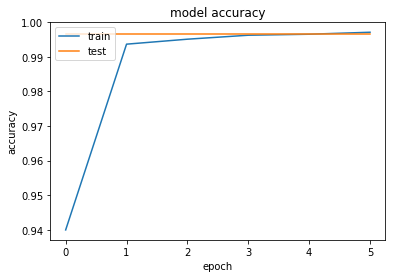

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

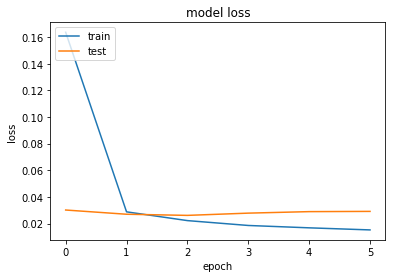

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()